# HSE 2025: Mathematical Methods for Data Analysis

## Homework 4: Clustering & Anomaly Detection

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `uci_har.csv`.

In [ ]:
import pandas as pd
data = pd.read_csv('uci_har.csv')
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING


This [dataset](http://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones) consists of database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

In [ ]:
data.shape

(1278, 563)

The target column is "Activity" which is the latest column, put it in a separate variable.

In [ ]:
import numpy as np

X, y_name = np.array(data.iloc[:, :-1]), data.iloc[:, -1]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y_name)


Split your data into **train** and **test** keeping 30% for the test.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score. Also print out confusion matrix

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

model = make_pipeline(
    SimpleImputer(strategy="mean"),
    SVC(kernel="linear", random_state=42)
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("F1 (macro):", f1)
print("Confusion matrix:\n", cm)


Accuracy: 0.9791666666666666
F1 (macro): 0.8390775415212103
Confusion matrix:
 [[74  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0]
 [ 0  7 65  0  0  0  0]
 [ 0  0  0 80  0  0  0]
 [ 0  0  0  0 57  0  0]
 [ 0  0  0  0  0 51  0]
 [ 0  0  0  0  1  0  0]]


Линейный SVM показывает высокую точность на тесте:

accuracy ≈ 0.98, при этом усреднённая по классам F1-мера ≈ 0.84

Это означает, что модель в целом хорошо разделяет классы, но качество между ними распределено неравномерно

По confusion matrix видно, что большинство классов почти всегда распознаются правильно, матрица близка к диагональной

Основные ошибки приходятся на отдельные пары активностей: часть объектов одного класса путается с другим, из-за чего проседает F1 для этих меньших по размеру классов

В терминах базового решения без подбора гиперпараметров линейный SVM даёт очень сильный стартовый результат


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=1`

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

pca = PCA(n_components=2, random_state=1)
X_pca = pca.fit_transform(X_imputed)


Draw the objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y` to the `scatter` method.

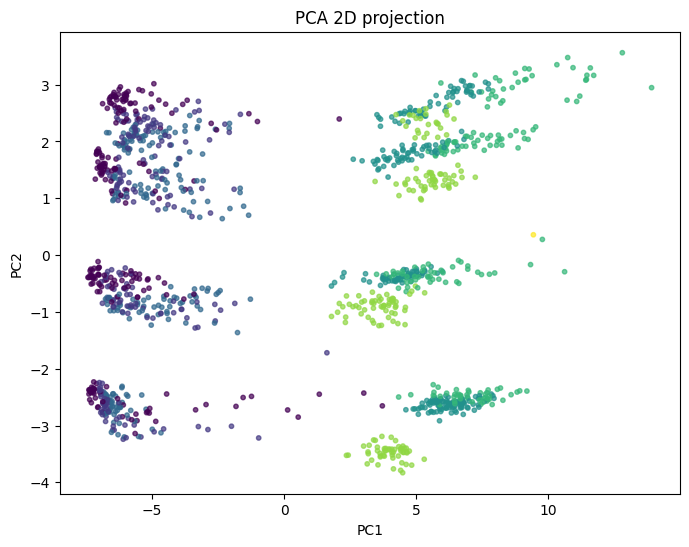

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=10, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D projection")
plt.show()


На проекции PCA в двумерное пространство видно, что объекты образуют несколько компактных облаков

Кластеры для разных типов активности частично разделяются по первой компоненте: группы точек слева и справа соответствуют разным классам

При этом внутри некоторых областей цвета заметно смешиваются, то есть линейное понижение размерности не даёт идеального разделения классов, но общая структура данных и близость похожих активностей хорошо видна


Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

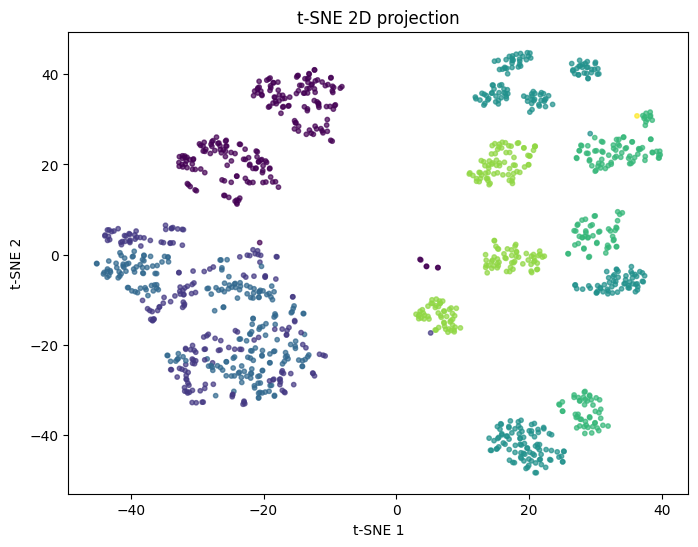

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_imputed)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=10, alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE 2D projection")
plt.show()


На t-SNE проекции классы разделяются заметно лучше, чем на PCA. Объекты одного класса собираются в компактные кластеры, между многими кластерами есть явные зазоры, пересечение цветов минимальное  

В отличие от линейного PCA, t-SNE лучше сохраняет локальную структуру:

близкие в исходном пространстве объекты оказываются рядом и в 2D, поэтому разные типы активности выглядят как отдельные группы

Это согласуется с тем, что t-SNE часто даёт более выразимую визуализацию сложных нелинейных структур данных


**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the TSNE method. Round the numbers to hundreds.

In [ ]:
cords_2_tsne = np.round(X_tsne[2], 2)

**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the PCA method. Round the numbers to hundreds.

In [ ]:
cords_2_pca = np.round(X_pca[2], 2)


**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

**2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable**

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

Тут подходит только вариант 2)

TSNE даёт хорошо разделённые кластеры разных цветов, а на PCA проекции классы заметно сильнее перемешаны, так что про визуальную разделенность для PCA говорить уже нельзя


##2

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

X_tsne_train, X_tsne_test, y_tsne_train, y_tsne_test = train_test_split(
    X_tsne, y, test_size=0.3, random_state=42
)

clf_tsne = SVC(kernel="linear", random_state=42)
clf_tsne.fit(X_tsne_train, y_tsne_train)

y_tsne_pred = clf_tsne.predict(X_tsne_test)

acc_tsne = accuracy_score(y_tsne_test, y_tsne_pred)
f1_tsne = f1_score(y_tsne_test, y_tsne_pred, average="macro")

print("Accuracy (t-SNE 2D):", acc_tsne)
print("F1 (macro, t-SNE 2D):", f1_tsne)


Accuracy (t-SNE 2D): 0.7265625
F1 (macro, t-SNE 2D): 0.6142768208984883


В качестве признакового представления я использовала двумерные координаты после t SNE, так как по визуализации классы там разделяются лучше чем на PCA. На этом представлении я снова обучила линейный SVM

Качество заметно ухудшилось по сравнению с моделью на исходных признаках: accuracy снизилась с примерно 0.98 до примерно 0.73, а F1 macro с примерно 0.84 до примерно 0.61

Это ожидаемо, так как при проекции в двумерное пространство теряется существенная часть информации, а t SNE оптимизируется под сохранение локальной структуры для визуализации, а не под задачу классификации

Поэтому для реального обучения лучше использовать исходные многомерные признаки, а понижение размерности оставлять скорее для анализа и визуализации данных


## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [ ]:
class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None
        self.centers = None
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        centers = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            mask = (self.labels == k)
            if np.any(mask):
                centers[k] = X[mask].mean(axis=0)
            else:
                centers[k] = X[np.random.randint(0, X.shape[0])]
        return centers

    def update_labels(self, X):
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

    def fit(self, X):
        self.centers = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        self.labels = self.update_labels(X)

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0

            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);


        return 1

    def predict(self, X):
        labels = pairwise_distances_argmin(X, self.centers)
        return labels


Generating data for clustering

In [ ]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [ ]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)**

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
from IPython.display import clear_output
import matplotlib.pyplot as plt

def plot_clust(X, centers, lables, ax):
    ax.scatter(X[:, 0], X[:, 1], c=lables)
    ax.scatter(centers[:, 0], centers[:, 1], marker='>', color='red')

kmeans = MyKMeans(n_clusters=3, n_iters=3, seed=42)
kmeans.fit(X)

labels = kmeans.labels
label_0 = labels[0]
print("Label for object 0:", label_0)


Label for object 0: 2


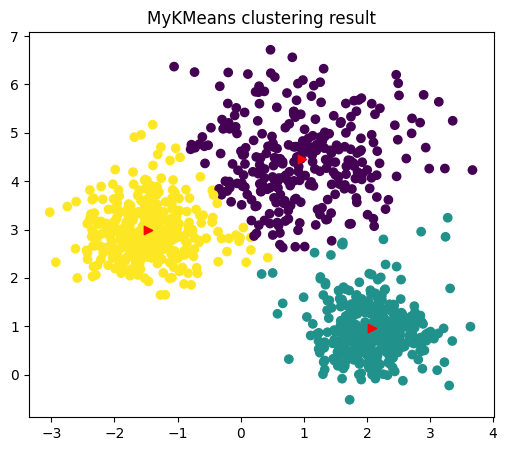

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
plot_clust(X, kmeans.centers, kmeans.labels, ax)
plt.title("MyKMeans clustering result")
plt.show()


Модель MyKMeans с n_clusters = 3 на данных noisy_blobs выделила три хорошо разделённых кластера, соответствующих трём группам точек

Центры кластеров находятся примерно в геометрических центрах этих групп, визуально разбиение выглядит корректным

 Объект с индексом 0 попал в кластер с меткой 2


7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converge by tolerance centers
Label for object 0: 2


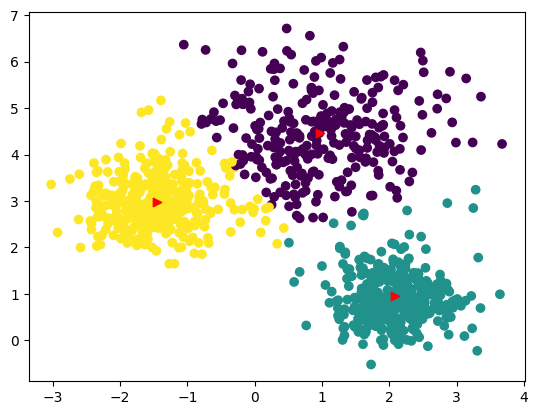

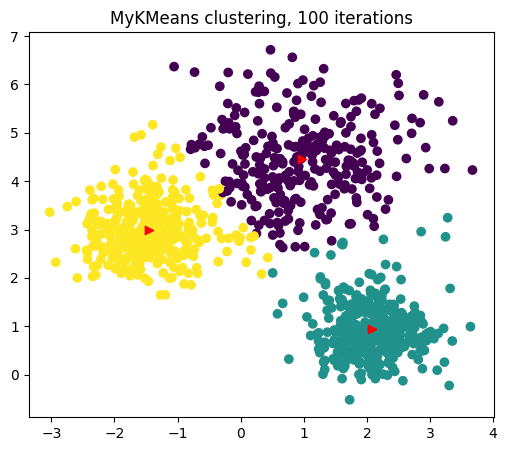

In [ ]:
kmeans_100 = MyKMeans(n_clusters=3, n_iters=100, seed=42)
kmeans_100.fit(X)

labels_100 = kmeans_100.labels
label_0_100 = labels_100[0]
print("Label for object 0:", label_0_100)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
plot_clust(X, kmeans_100.centers, kmeans_100.labels, ax)
plt.title("MyKMeans clustering, 100 iterations")
plt.show()


При увеличении числа итераций до 100 разбиение на кластеры не изменилось: центры быстро сошлись, и объект с индексом 0
по-прежнему относится к кластеру с меткой 2

Это означает, что уже за первые несколько итераций алгоритм нашёл устойчивое решение, и дальнейшие итерации его почти не меняют


7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [ ]:
num_of_changed = np.sum(labels != labels_100)

**Task 8. <a id="task6"></a> (1.5 points)**

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2.

Converge by tolerance centers


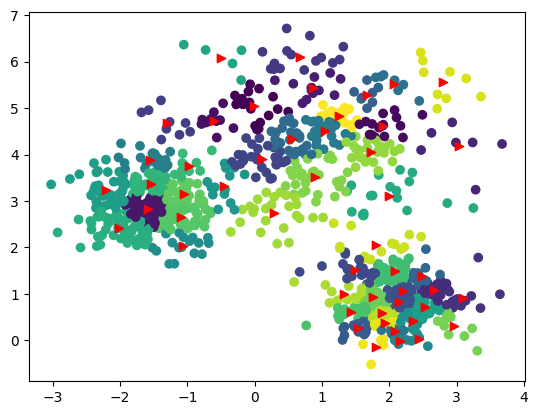

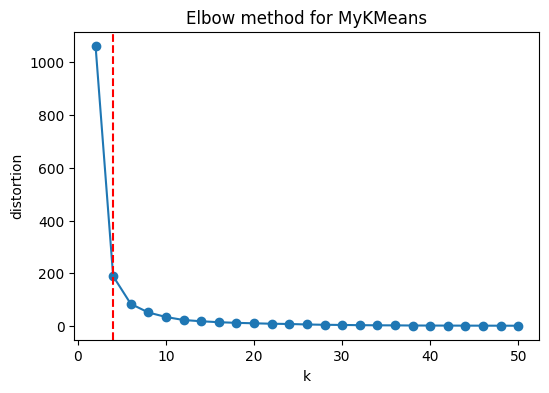

In [ ]:
k_values = list(range(2, 52, 2))
metrics = []

for k in k_values:
    km = MyKMeans(n_clusters=k, n_iters=100, seed=42)
    km.fit(X)
    dists = np.linalg.norm(X - km.centers[km.labels], axis=1) ** 2
    metric = dists.sum() / k
    metrics.append(metric)

plt.figure(figsize=(6, 4))
plt.plot(k_values, metrics, marker='o')
k_opt = 4
plt.axvline(k_opt, linestyle='--', color='red')
plt.xlabel("k")
plt.ylabel("distortion")
plt.title("Elbow method for MyKMeans")
plt.show()


По графику зависимости метрики от числа кластеров видно, что после k = 4 спад искажения сильно замедляется и кривая становится почти пологой

Точка k = 4 выглядит как локоть, поэтому по методу локтя выбираю оптимальное число кластеров k ≈ 4

При дальнейшем увеличении числа кластеров улучшение метрики становится незначительным


## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

Label for object 2: 0


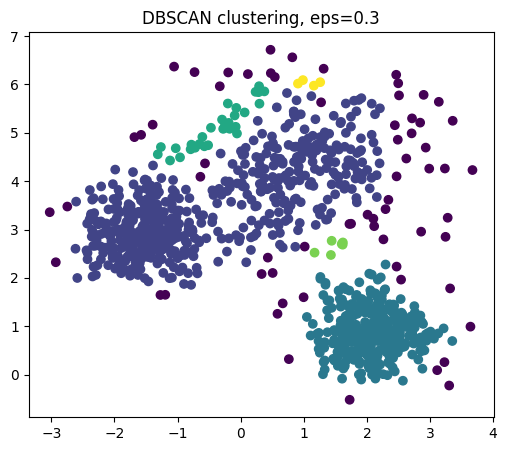

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.3)
dbscan.fit(X)
db_labels = dbscan.labels_

label_2_dbscan = db_labels[2]
print("Label for object 2:", label_2_dbscan)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=db_labels)
plt.title("DBSCAN clustering, eps=0.3")
plt.show()


DBSCAN с eps = 0.3 выделил несколько плотных кластеров и много точек пометил как шум

Объект с индексом 2 получил метку 0, то есть относится к одному из основных плотных кластеров


**Task 10. <a id="task8"></a> (1 point)**

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

eps=0.1, min_samples=3: clusters=63, outliers=349


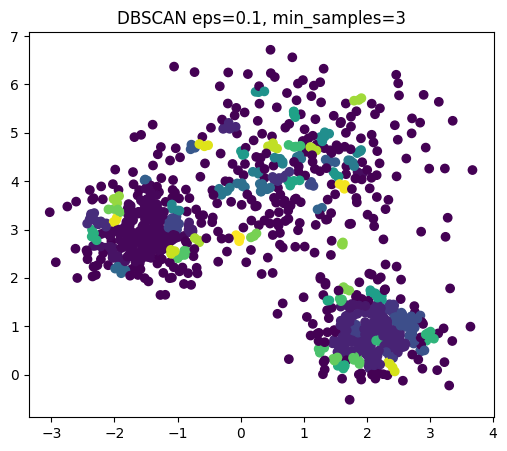

eps=0.2, min_samples=3: clusters=17, outliers=96


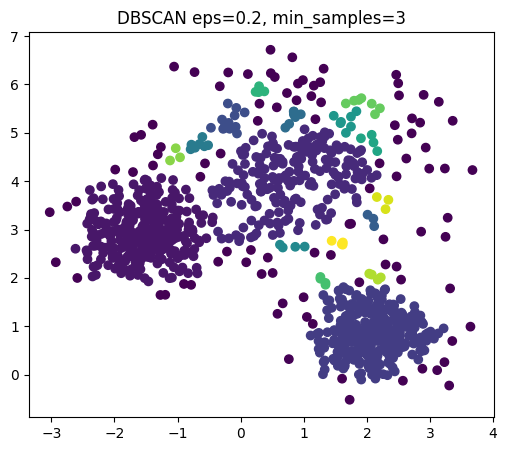

eps=0.3, min_samples=3: clusters=5, outliers=42


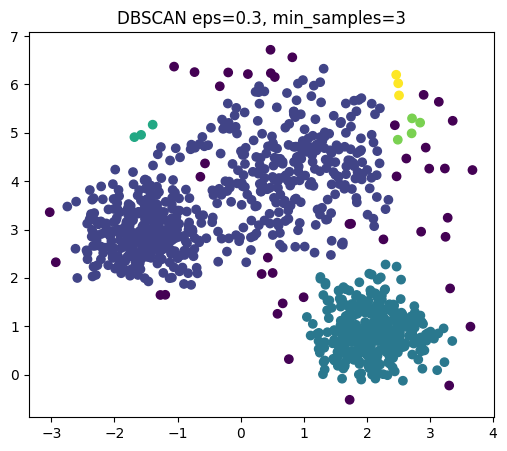

eps=0.4, min_samples=3: clusters=4, outliers=16


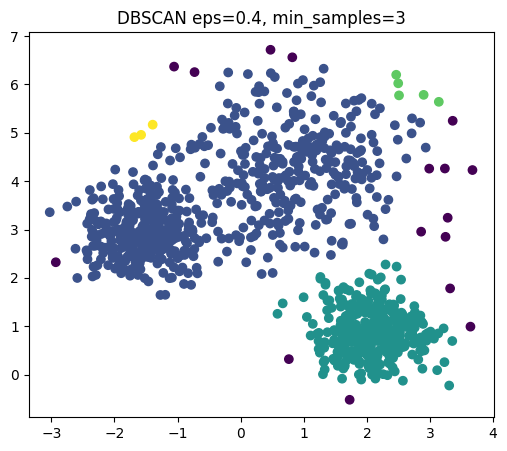

eps=0.5, min_samples=3: clusters=2, outliers=2


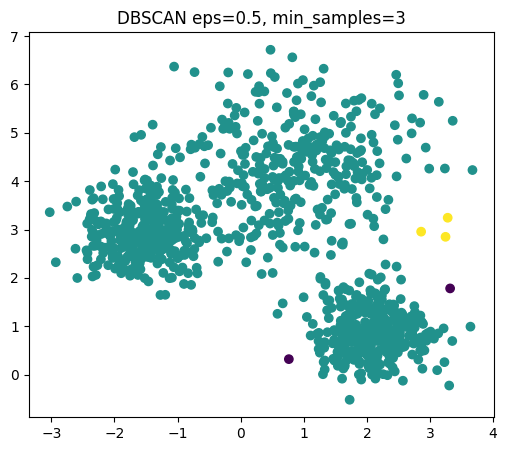

eps=0.1, min_samples=5: clusters=25, outliers=567


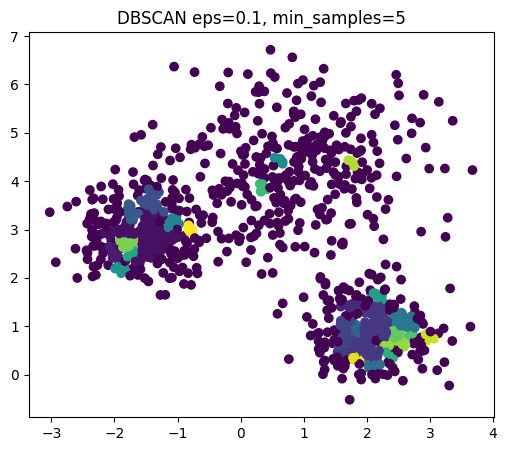

eps=0.2, min_samples=5: clusters=10, outliers=161


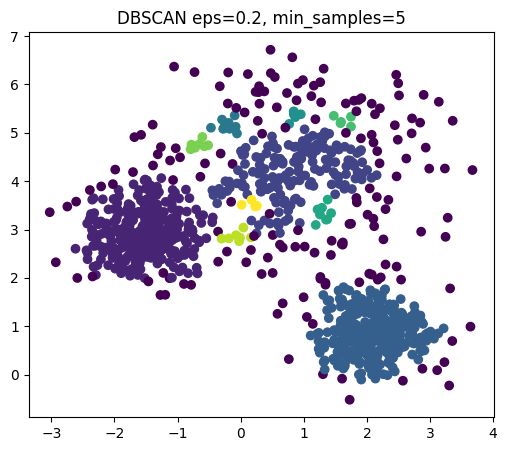

eps=0.3, min_samples=5: clusters=5, outliers=65


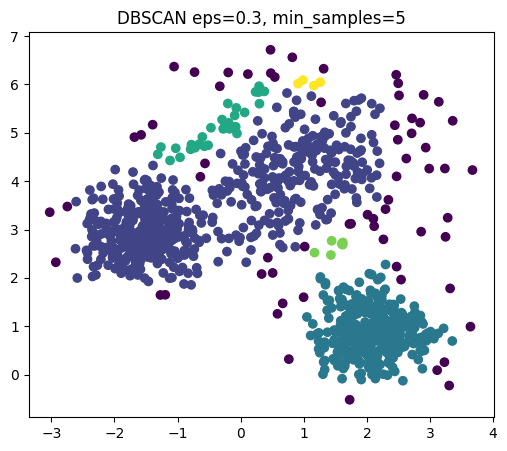

eps=0.4, min_samples=5: clusters=2, outliers=27


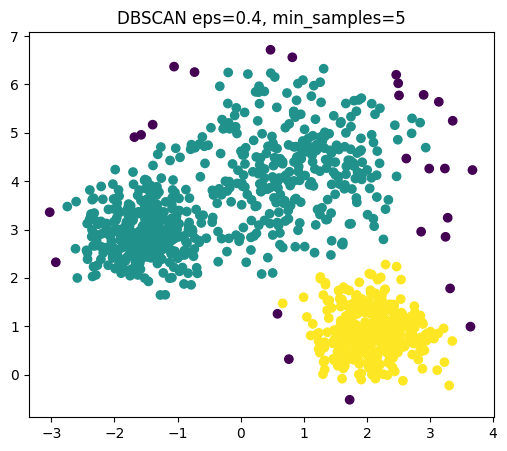

eps=0.5, min_samples=5: clusters=1, outliers=11


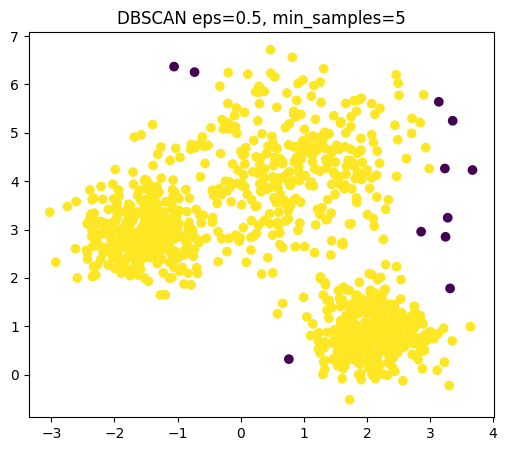

eps=0.1, min_samples=10: clusters=5, outliers=902


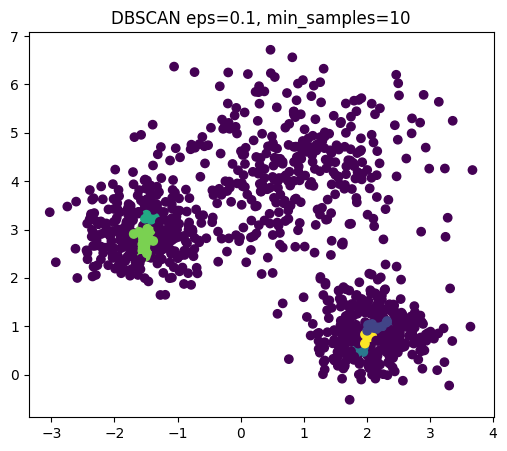

eps=0.2, min_samples=10: clusters=5, outliers=387


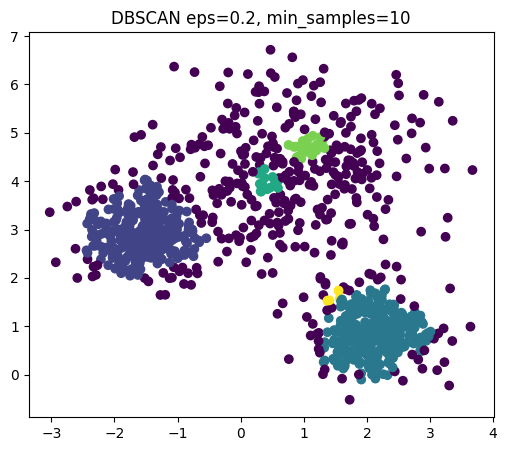

eps=0.3, min_samples=10: clusters=4, outliers=145


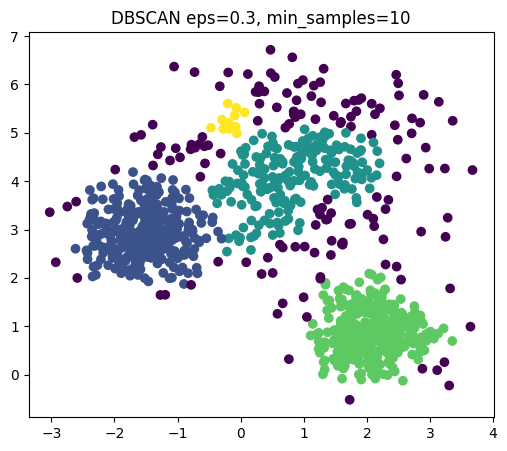

eps=0.4, min_samples=10: clusters=2, outliers=61


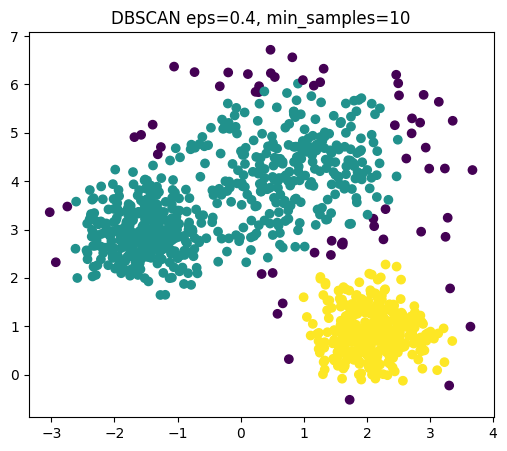

eps=0.5, min_samples=10: clusters=2, outliers=22


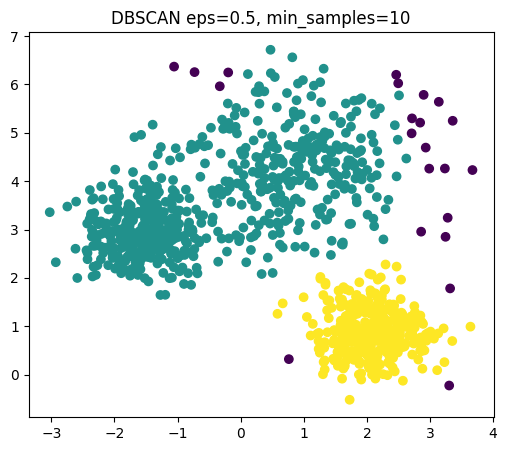

In [ ]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [3, 5, 10]

for ms in min_samples_values:
    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        db.fit(X)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_outliers = np.sum(labels == -1)

        print(f"eps={eps}, min_samples={ms}: clusters={n_clusters}, outliers={n_outliers}")

        plt.figure(figsize=(6, 5))
        plt.scatter(X[:, 0], X[:, 1], c=labels)
        plt.title(f"DBSCAN eps={eps}, min_samples={ms}")
        plt.show()


При маленьком eps = 0.1 DBSCAN находит очень много мелких кластеров и большое количество выбросов, алгоритм видит только локальные плотные группы

По мере увеличения eps кластеры начинают склеиваться, их количество уменьшается, а число выбросов падает

При eps ≈ 0.3 и min_samples от 3 до 5 структура данных выглядит наиболее разумной: выделяются несколько устойчивых кластеров и умеренное число выбросов

При eps ≥ от 0.4 до 0.5 большая часть точек попадает в один – два кластера, а выбросов почти не остаётся, модель становится слишком гладкой и теряет детальную структуру
